In [8]:
import numpy as np
from metpy.cbook import get_test_data
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from netCDF4 import Dataset

from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                        cartopy_xlim, cartopy_ylim, interpline, CoordPair)
#reading netcdf files
ysu= xr.open_dataset("wrf_ysu_24112020_06.nc")
myj = xr.open_dataset("wrf_myj_24112020_06.nc")
qnse = xr.open_dataset("wrf_QNSE_24112020_06.nc")
mynn = xr.open_dataset("wrf_mynn3_24112020_06.nc")



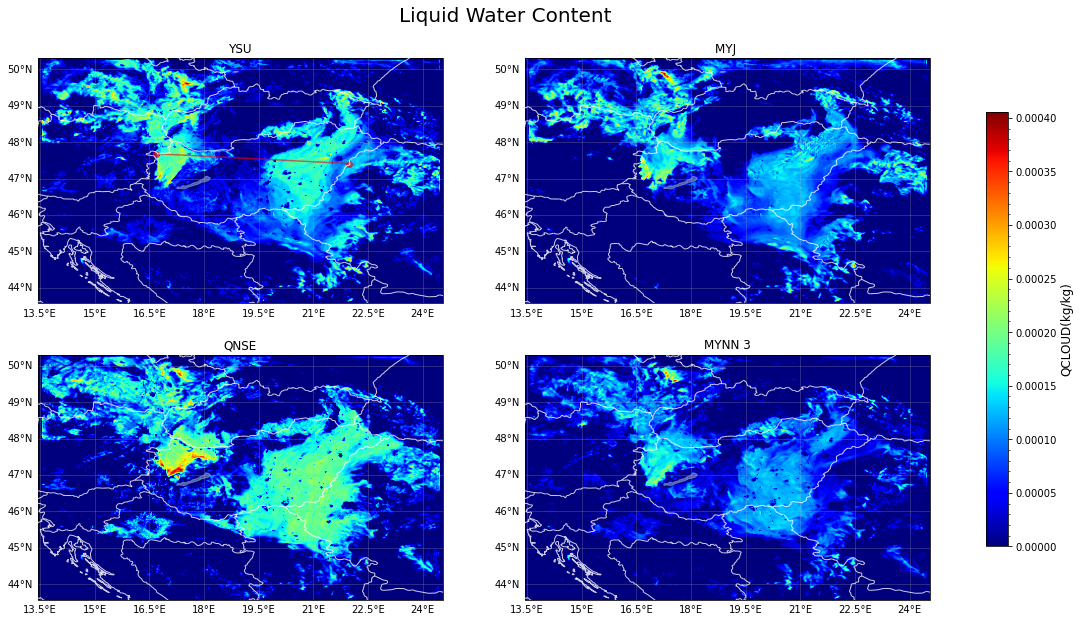

In [9]:
#reading variables
var = 'QCLOUD'
lwc_y = ysu.metpy.parse_cf(var)
lwc_m = myj.metpy.parse_cf(var)
lwc_q = qnse.metpy.parse_cf(var)
lwc_mn = mynn.metpy.parse_cf(var)

#selecting the time and first pressure level
lwc_y = lwc_y.isel(Time=0).sel(bottom_top=0)
lwc_m = lwc_m.isel(Time=0).sel(bottom_top=0)
lwc_q = lwc_q.isel(Time=0).sel(bottom_top=0)
lwc_mn = lwc_mn.isel(Time=0).sel(bottom_top=0)

y1 = lwc_y.XLAT #reading lattitudes from variable
x1 = lwc_y.XLONG #reading longitude
y2 = lwc_m.XLAT #reading lattitudes from variable
x2 = lwc_m.XLONG #reading longitude
y3 = lwc_q.XLAT #reading lattitudes from variable
x3 = lwc_q.XLONG #reading longitude
y4 = lwc_mn.XLAT #reading lattitudes from variable
x4 = lwc_mn.XLONG #reading longitude

start_point = CoordPair(lat=47.68, lon=16.69)
end_point = CoordPair(lat=47.41, lon=21.98)

crs = ccrs.PlateCarree()
# Create the figure and plot background on different axes
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), constrained_layout=False,
                           subplot_kw={'projection': crs})

axlist = axarr.flatten()

#===================================================================================================#
#               YSU LWC (QCLOUD) spatial plot
#===================================================================================================

# here where magic happen
mp1 = axlist[0].imshow(lwc_y,norm=None,extent=(x1.min(),x1.max(), y1.min(), y1.max())
                       ,cmap='jet', origin='lower')#,vmin = 0, vmax =0.0004)
axlist[0].plot([start_point.lon, end_point.lon],
            [start_point.lat, end_point.lat], color="red", marker="o",
            transform=ccrs.PlateCarree(), zorder=2,alpha=0.6)
axlist[0].set_title('YSU', fontsize=12)
#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                             scale='10m',
                                    facecolor='none')
axlist[0].add_feature(cfeature.BORDERS,edgecolor='white',alpha=0.8,zorder=3)
axlist[0].add_feature(cfeature.COASTLINE,edgecolor='white', alpha=0.8,zorder=3)
axlist[0].add_feature(cfeature.LAKES, alpha=0.5)
# # adding colorbar and adjust the size
# cbar = fig.colorbar(mp, shrink=0.2)
# cbar.minorticks_on()
# # cbar.set_label('LWC(kg/kg)',fontsize=12)
# #cbar.set_clim(0,0.0003)

#adding the long lat grids and enabling the tick labels
gl1 = axlist[0].gridlines(draw_labels=True, edgecolor='white', alpha=0.3)
gl1.top_labels = False
gl1.right_labels = False


#===================================================================================================#
#===================================================================================================
# here where magic happen
mp2 = axlist[1].imshow(lwc_m,norm=None,extent=(x2.min(),x2.max(), y2.min(), y2.max())
                       ,cmap='jet', origin='lower')#,vmin = 0, vmax =0.0004)
axlist[1].set_title('MYJ ', fontsize=12)

#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                             scale='10m',
                                    facecolor='none')
axlist[1].add_feature(cfeature.BORDERS,edgecolor='white',alpha=0.8,zorder=3)
axlist[1].add_feature(cfeature.COASTLINE,edgecolor='white', alpha=0.8,zorder=3)
axlist[1].add_feature(cfeature.LAKES, alpha=0.5)

# # adding colorbar and adjust the size
# cbar = fig.colorbar(mp2, shrink=0.2)
# cbar.minorticks_on()
# cbar.set_label('LWC(kg/kg)',fontsize=12)
# #cbar.set_clim(0,0.0003)

#adding the long lat grids and enabling the tick labels
gl2 = axlist[1].gridlines(draw_labels=True, edgecolor='white', alpha=0.3)
gl2.top_labels = False
gl2.right_labels = False



#===================================================================================================#
#===================================================================================================

# ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree()) #adding project within the opened figure

# here where magic happen
#mp = ax.imshow(im_data,extent=(x.min(),x.max(), y.min(), y.max()),cmap='jet', origin='lower',vmin = 0, vmax =0.0003)
mp3 = axlist[2].imshow(lwc_q, norm=None, extent=(x3.min(), x3.max(), y3.min(), y3.max())
                       , cmap='jet', origin='lower',)# vmin = 0, vmax = 0.0004)

axlist[2].set_title('QNSE', fontsize=12)
#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                   scale='10m',
                   facecolor='none')
axlist[2].add_feature(cfeature.BORDERS, edgecolor='white', alpha=0.8,zorder=3)
axlist[2].add_feature(cfeature.COASTLINE,edgecolor='white', alpha=0.8,zorder=3)
axlist[2].add_feature(cfeature.LAKES, alpha=0.5)
# # adding colorbar and adjust the size
# cbar = fig.colorbar(mp, shrink=0.2)
# cbar.minorticks_on()
# # cbar.set_label('kg/kg',fontsize=12)
# # ax.add_feature(cfeature.COASTLINE,edgecolor='white',alpha=0.6)
gl3 = axlist[2].gridlines(draw_labels=True, edgecolor='white', alpha=0.3)
gl3.top_labels = False
gl3.right_labels = False



# #===================================================================================================#
# #===================================================================================================
# ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree()) #adding project within the opened figure

# here where magic happen
#mp = ax.imshow(im_data,extent=(x.min(),x.max(), y.min(), y.max()),cmap='jet', origin='lower',vmin = 0, vmax =0.0003)
mp4 = axlist[3].imshow(lwc_mn, norm=None, extent=(x4.min(), x4.max(), y4.min(), y4.max())
                       , cmap='jet', origin='lower',)# vmin = 0, vmax = 0.0004)
axlist[3].set_title('MYNN 3', fontsize=12)
#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                   scale='10m',
                   facecolor='none')
axlist[3].add_feature(cfeature.BORDERS, edgecolor='white', alpha=0.8,zorder=3)
axlist[3].add_feature(cfeature.COASTLINE,edgecolor='white', alpha=0.8,zorder=3)
axlist[3].add_feature(cfeature.LAKES, alpha=0.5)

# # adding colorbar and adjust the size
# cbar = fig.colorbar(mp, shrink=0.2)
# cbar.minorticks_on()
# # cbar.set_label('kg/kg',fontsize=12)
# ax.add_feature(cfeature.COASTLINE,edgecolor='white',alpha=0.6)
gl4 = axlist[3].gridlines(draw_labels=True, edgecolor='white', alpha=0.3)
gl4.top_labels = False
gl4.right_labels = False
# # plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=2.0)
# plt.tight_layout()


axbar = [axlist[0],axlist[1],axlist[2],axlist[3]]#,axlist[4],axlist[5],axlist[6],axlist[7]]
cbar = fig.colorbar(mp1, ax=axbar,shrink=0.8)
cbar.minorticks_on()
cbar.set_label('QCLOUD(kg/kg)',fontsize=12)
plt.savefig("multi_QCLOUD.jpg",dpi=300)
fig.suptitle('Liquid Water Content',x=0.45, y=.95,fontsize=20)
plt.show()